In [58]:
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)


TensorFlow Version: 2.20.0


In [59]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import os

In [60]:
DATASET_PATH = "dataset"
IMG_SIZE = 224
BATCH_SIZE = 32
SEED = 123

In [61]:
train_ds = keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.3,
    subset="training",
    seed=SEED,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

val_test_ds = keras.utils.image_dataset_from_directory(
    DATASET_PATH,
    validation_split=0.3,
    subset="validation",
    seed=SEED,
    image_size=(IMG_SIZE, IMG_SIZE),
    batch_size=BATCH_SIZE
)

class_names = train_ds.class_names
print("Classes:", class_names)


Found 1944 files belonging to 15 classes.
Using 1361 files for training.
Found 1944 files belonging to 15 classes.
Using 583 files for validation.
Classes: ['Bear', 'Bird', 'Cat', 'Cow', 'Deer', 'Dog', 'Dolphin', 'Elephant', 'Giraffe', 'Horse', 'Kangaroo', 'Lion', 'Panda', 'Tiger', 'Zebra']


In [62]:
val_batches = int(0.5 * len(val_test_ds))

val_ds = val_test_ds.take(val_batches)
test_ds = val_test_ds.skip(val_batches)

print("Validation batches:", len(val_ds))
print("Test batches:", len(test_ds))


Validation batches: 9
Test batches: 10


In [63]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)


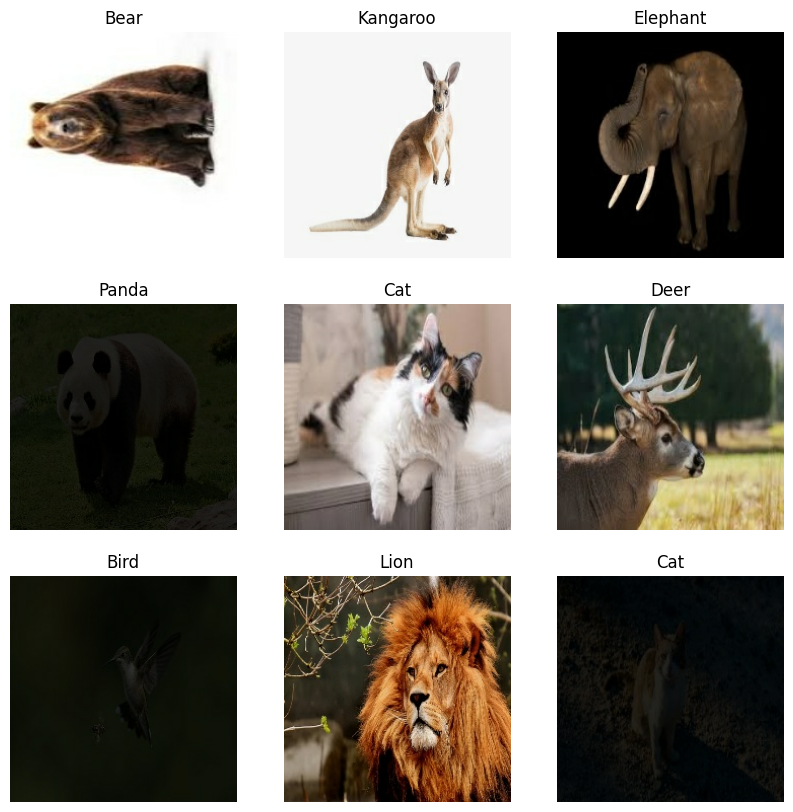

In [64]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [65]:
for images, labels in train_ds.take(1):
    print(images.shape)

(32, 224, 224, 3)


In [66]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.applications import MobileNetV2

num_classes = 15

base_model = MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet'
)

base_model.trainable = False  # Freeze base model

model = keras.Sequential([
    layers.Rescaling(1./127.5, offset=-1, input_shape=(224, 224, 3)),
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])


c:\Users\Anand\OneDrive\Desktop\ML Internship\venv\Lib\site-packages\keras\src\layers\preprocessing\data_layer.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [67]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [68]:
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10
)


Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 26s 517ms/step - accuracy: 0.6539 - loss: 1.2285 - val_accuracy: 0.9444 - val_loss: 0.2443
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 20s 457ms/step - accuracy: 0.9170 - loss: 0.2863 - val_accuracy: 0.9583 - val_loss: 0.1485
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 24s 551ms/step - accuracy: 0.9640 - loss: 0.1427 - val_accuracy: 0.9618 - val_loss: 0.1081
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 25s 590ms/step - accuracy: 0.9743 - loss: 0.0984 - val_accuracy: 0.9618 - val_loss: 0.1052
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 25s 580ms/step - accuracy: 0.9868 - loss: 0.0621 - val_accuracy: 0.9549 - val_loss: 0.1322
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 26s 607ms/step - accuracy: 0.9919 - loss: 0.0419 - val_accuracy: 0.9792 - val_loss: 0.0629
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 24s 553ms/step - accuracy: 0.9927 - loss: 0.0331 - val_accuracy: 0.9826 - val_loss: 0.0761
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 27s 629ms/step - accuracy: 0.9919 - loss: 0.0330 - val_accu

In [69]:
model.save("animal_classifier_model.h5")

In [70]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image

class_names = [
    "Bear", "Bird", "Cat", "Cow", "Deer",
    "Dog", "Dolphin", "Elephant", "Giraffe",
    "Horse", "Kangaroo", "Lion", "Panda",
    "Tiger", "Zebra"
]

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)

    img_array = (img_array / 127.5) - 1  # same scaling as model

    predictions = model.predict(img_array)
    predicted_class = class_names[np.argmax(predictions)]

    print("Predicted Animal:", predicted_class)


In [71]:
test_loss, test_accuracy = model.evaluate(test_ds)

print("Final Test Accuracy:", test_accuracy)
print("Final Test Loss:", test_loss)


10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 676ms/step - accuracy: 0.9729 - loss: 0.0884
Final Test Accuracy: 0.9728813767433167
Final Test Loss: 0.08837360143661499


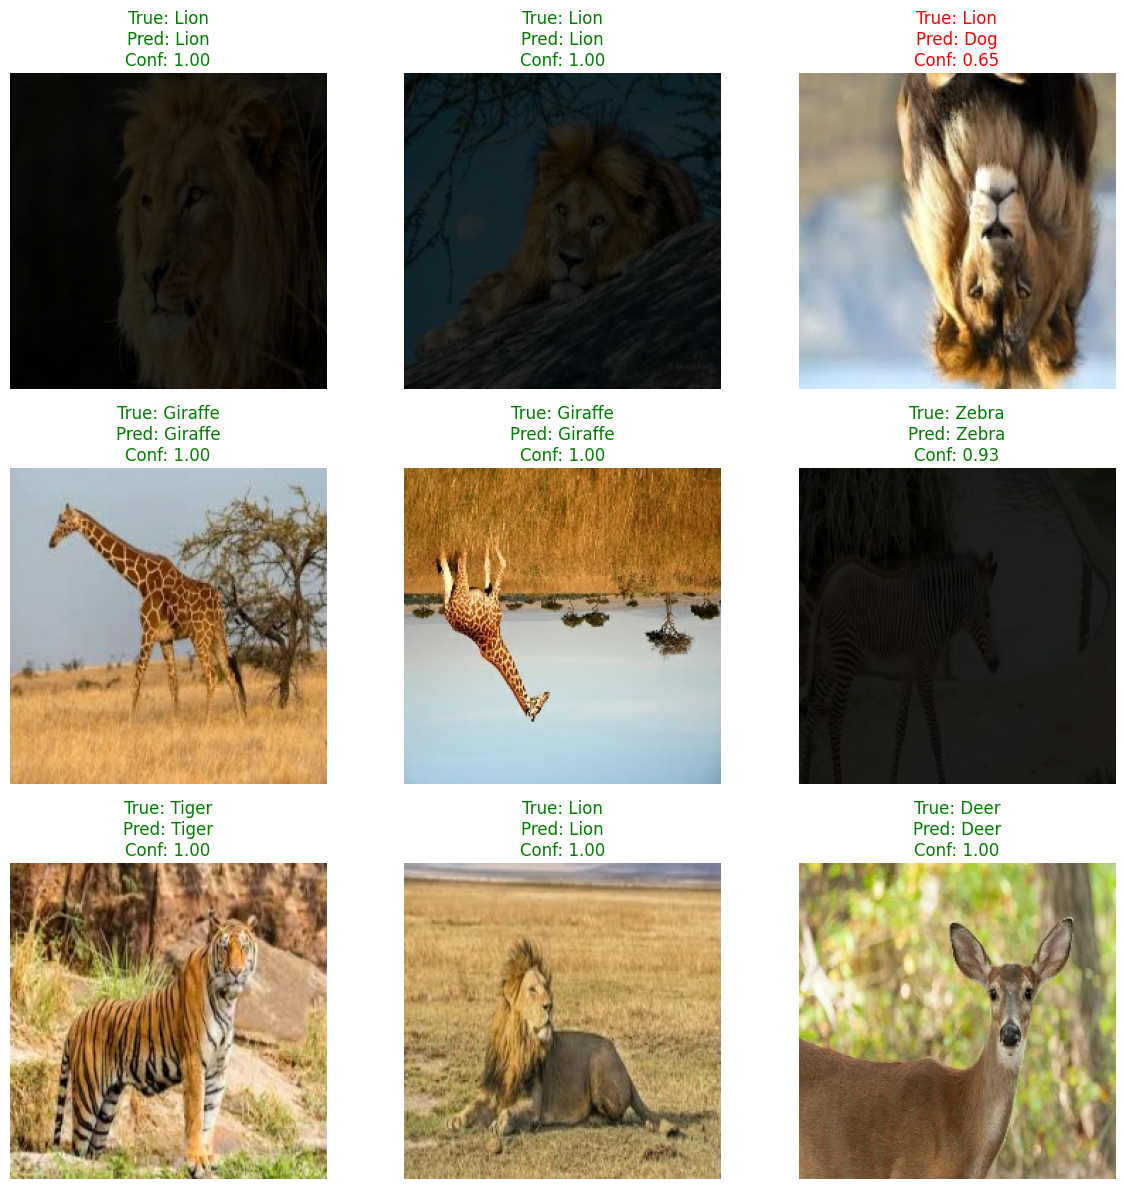

In [74]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 12))

for images, labels in test_ds.take(1):

    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)

        img = images[i]
        true_label = labels[i]

        # Prepare image
        img_array = np.expand_dims(img, axis=0)
        # img_array = (img_array / 127.5) - 1 # same scaling as model as double normalization destroyed accuracy.

        # Predict
        predictions = model.predict(img_array, verbose=0)
        predicted_label = np.argmax(predictions)
        confidence = np.max(predictions)

        # Display image
        plt.imshow(img.numpy().astype("uint8"))

        if predicted_label == true_label:
            color = "green"
        else:
            color = "red"

        plt.title(
            f"True: {class_names[true_label]}\nPred: {class_names[predicted_label]}\nConf: {confidence:.2f}",
            color=color
        )

        plt.axis("off")

    break

plt.tight_layout()
plt.show()


<Figure size 1200x1200 with 0 Axes>

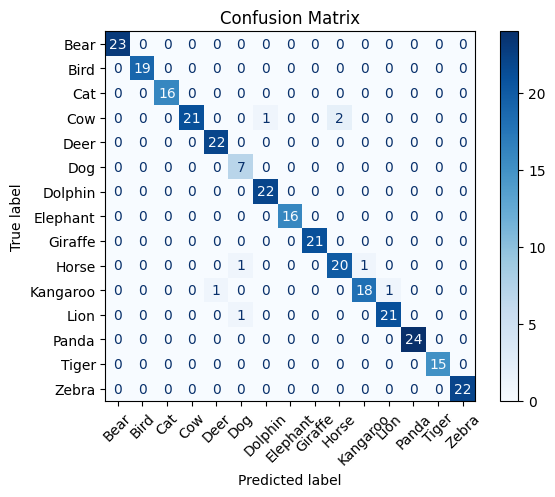

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_true = []
y_pred = []

for images, labels in test_ds:
    predictions = model.predict(images, verbose=0)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(predictions, axis=1))

cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12, 12))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues, xticks_rotation=45)
plt.title("Confusion Matrix")
plt.show()
